# Advanced Lane Finding Project

The goals / steps of this project are the following:
* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [8]:
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt




# 1. Camera calibration


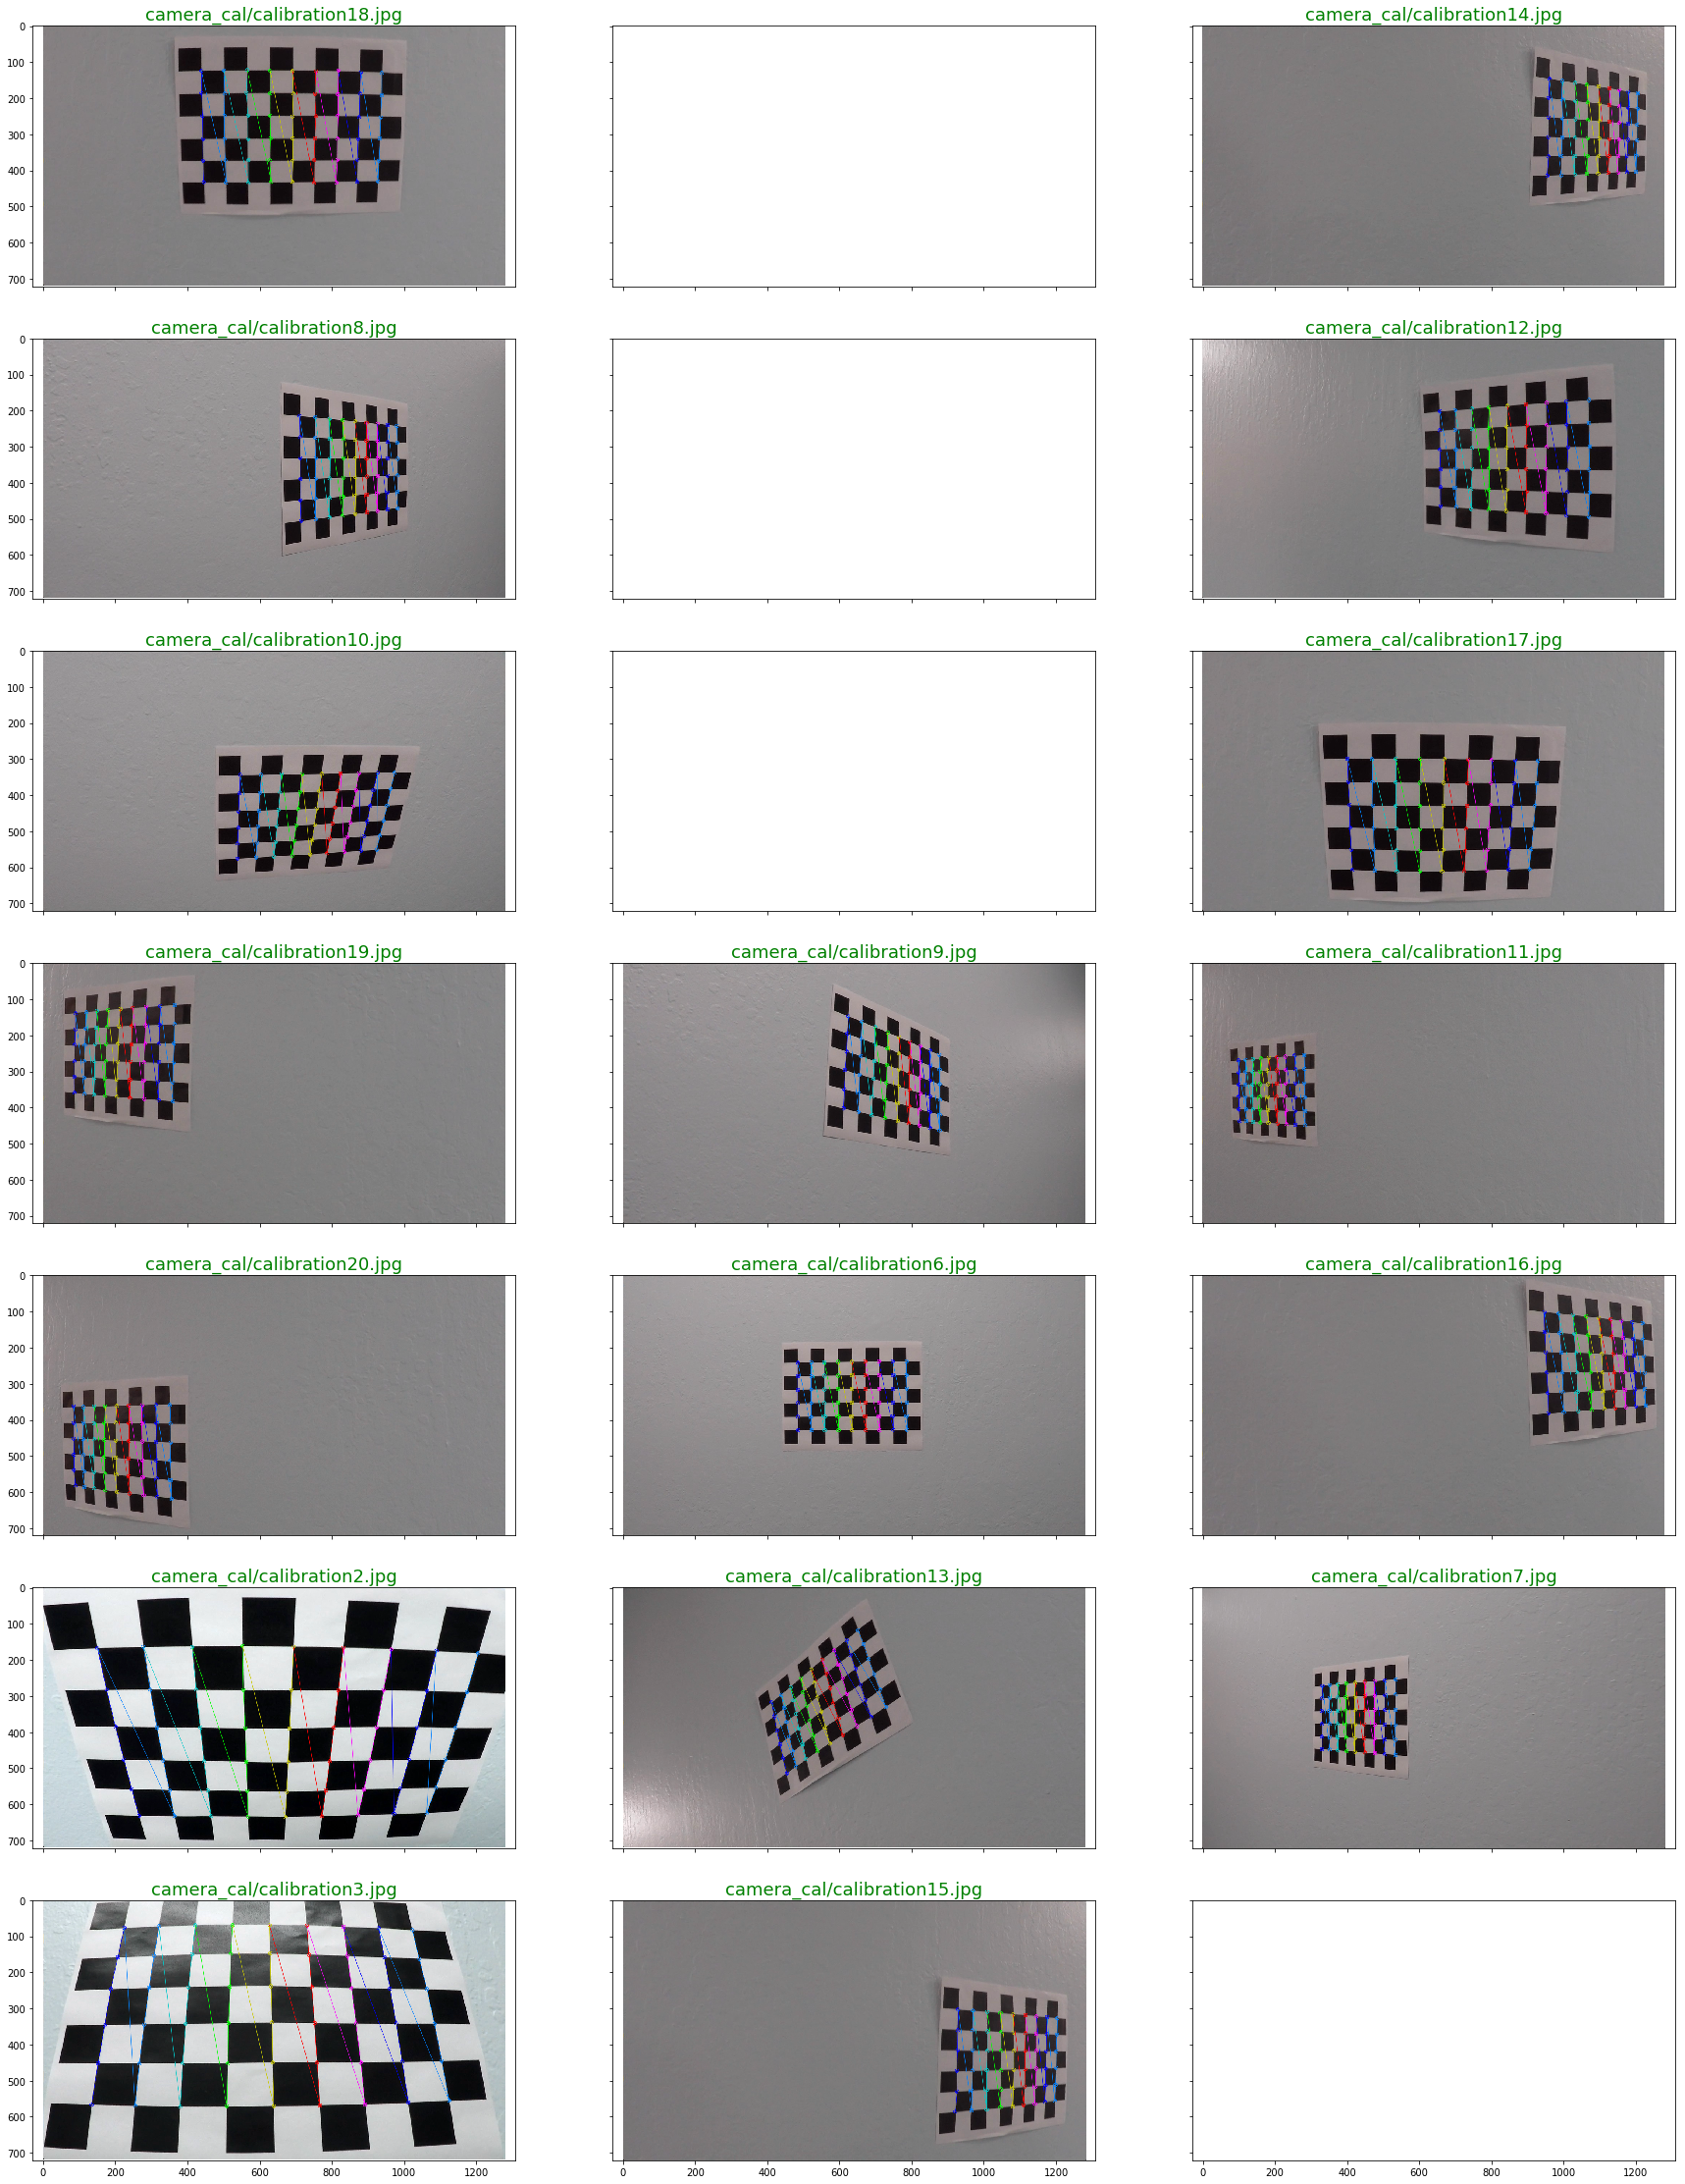

In [39]:
from pdb import set_trace as bp
class chessboard(object):
    
    def __init__(self, img_file, rows, cols, show=False, save=False, axes=None):
        self.img_file = img_file
        try:
            with open(self.img_file) as fd:
                self.img = cv2.imread(calib_file)
            self.gray = cv2.cvtColor(self.img, cv2.COLOR_BGR2GRAY)                
        except Excption as ex:
            print(ex)
            raise
        
        self.rows = rows
        self.cols = cols
        self.save = save
        self.show = show
        self.axes = axes

        
    @property
    def shape(self):
        return self.img.shape

    def findChessboardCorners(self):
        found, corners = cv2.findChessboardCorners(self.gray, (self.rows, self.cols), None)
        if not found:
            return None
            
            
            #raise Exception('{} not chessboard corners found'.format(self.img_file))
        
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners = cv2.cornerSubPix(image=self.gray, corners=corners, winSize=(7, 7), zeroZone=(-1, -1), criteria=criteria)

        if self.show or self.save:
            img = self.img.copy()
            cv2.drawChessboardCorners(img, (self.rows, self.cols), corners, found)
            
            if self.show:
                self.axes.imshow(img)
                self.axes.set_title(self.img_file, color='g', fontsize=18)

            if self.save:
                cv2.imwrite("{}/1_chessboard_{}".format(OUT, os.path.split(self.img_file)[-1]), img)
                
        return corners
    
show = True
save = True
cols, rows = 9, 6
object_points = np.zeros((rows * cols, 3), np.float32)
object_points[:, :2] = np.mgrid[:rows, :cols].T.reshape(-1,2)


if show:
    f, axes = plt.subplots(7, 3, squeeze=True, sharex=True, sharey=True, figsize=(30, 40))
    axes = axes.flatten()

image_corners, object_corners = [], []
for i, calib_file in enumerate(glob.glob('camera_cal/*.jpg')):
    chessboard_i = chessboard(calib_file, rows, cols, show=show, save=save, axes=axes[i])
    corners = chessboard_i.findChessboardCorners()
    if corners is None:
        continue
    image_corners.append(corners)
    object_corners.append(object_points)
else:
    # this should fit all versions of OpenCV
#     try:
#         ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_corners, image_corners, chessboard_i.shape[::-1], None, None)
#     except:
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(object_corners, image_corners, chessboard_i.shape[::-1][1:3], None, None)
    np.savez('{}/calib.npz'.format(CACHE), mtx=mtx, dist=dist, rvecs=rvecs, tvecs=tvecs)


## Undistort

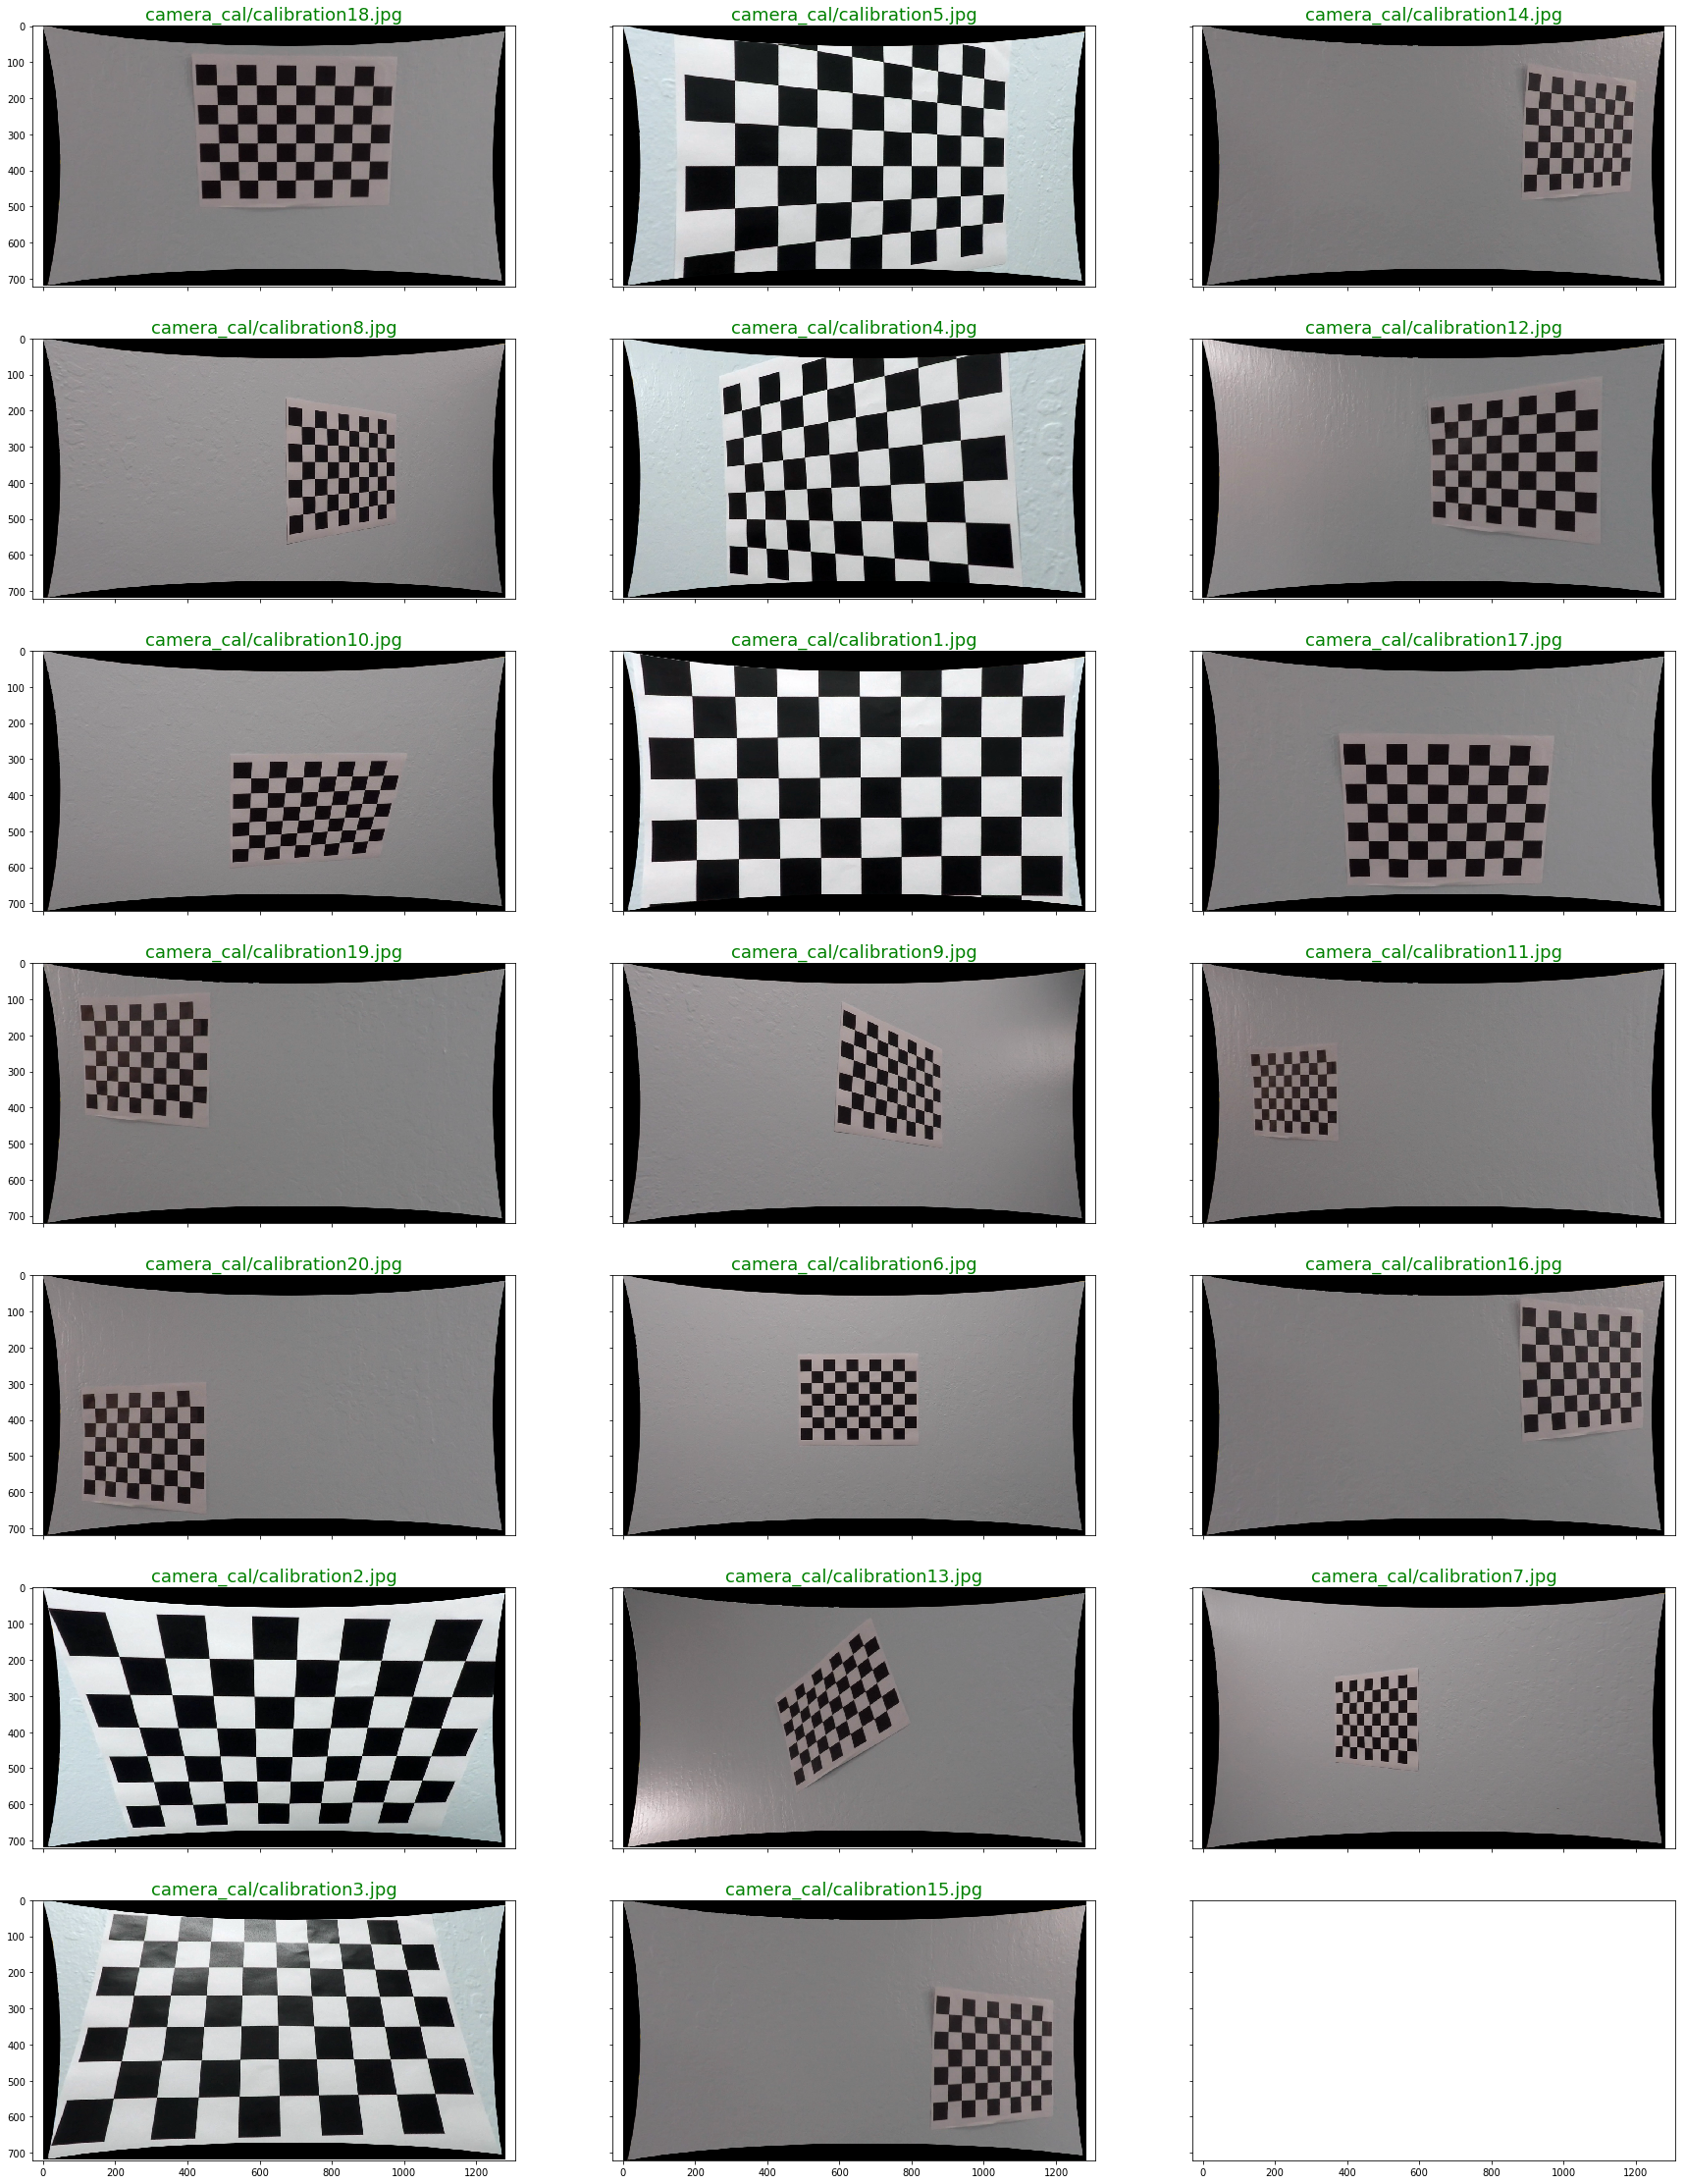

In [33]:
show = True
if show:
    f, axes = plt.subplots(7, 3, squeeze=True, sharex=True, sharey=True, figsize=(30, 40))
    axes = axes.flatten()
    

for i, calib_file in enumerate(glob.glob('camera_cal/*.jpg')):
    
    img = cv2.imread(calib_file)
    h, w = img.shape[:2]
    calibration_matrix, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
    
    undistorted = cv2.undistort(img, mtx, dist, None, calibration_matrix)

    if show:
        axes[i].imshow(undistorted)
        axes[i].set_title(calib_file, color='g', fontsize=18)
        